In [ ]:
import requests
from bs4 import BeautifulSoup

In [ ]:
BASE_URL = "https://www.rottentomatoes.com/m/joker_folie_a_deux/reviews"
MAX_PAGES = 1
all_reviews = []

In [ ]:
# Creamos el scraping de reviews

for page in range(1,MAX_PAGES+1):
  response = requests.get(f"{BASE_URL}?page={page}")

  if response.status_code != 200:
    print("Error en la conexión")
    continue

  soup = BeautifulSoup(response.content, 'html.parser')

  review_containers = soup.find_all('div', class_='review-text-container')

  for container in review_containers:
    review_text = container.find('p',{'data-qa':'review-quote'}).text.strip()
    review_date = container.find('span',{'data-qa':'review-date'}).text.strip()
    review_tag = container.find('a', class_= 'full-url')
    review_link =  review_tag['href'] if review_tag else None

    review = {
        'text': review_text,
        'date': review_date,
        'link': review_link
    }

    all_reviews.append(review)

In [ ]:
print(all_reviews)

[{'text': 'Phillips stays on the surface and lends them little physicality, little flair to match the songs...', 'date': 'Oct 8, 2024', 'link': 'https://www.newyorker.com/culture/the-front-row/the-flat-provocations-of-joker-folie-a-deux'}, {'text': '"As if to compensate for the first movie\'s deficiencies, \'Joker: Folie à Deux\' is a story entirely about thoughtful depictions of different psychological conditions."', 'date': 'Oct 8, 2024', 'link': 'https://www.salon.com/2024/10/08/joker-folie--deux-refers-to-a-real-mental-illness-in-its-title--and-is-great-at-showing-it/'}, {'text': 'Folie a Deux functions as an overlong, pretentious coda – a slog that barely advances the narrative while regurgitating elements from the first film', 'date': 'Oct 8, 2024', 'link': 'https://www.reelviews.net/reelviews/joker-folie-a-deux'}, {'text': 'Overlong but more finely tuned than the 2019 genre-bending drama, this sequel inventively swirls around musical sequences that use timeless standards to dig 

In [ ]:
# Reviews enumeradas

for index, review in enumerate(all_reviews,1):
  print(f"Review {index}: {review['text']}\n")

Review 1: Phillips stays on the surface and lends them little physicality, little flair to match the songs...

Review 2: "As if to compensate for the first movie's deficiencies, 'Joker: Folie à Deux' is a story entirely about thoughtful depictions of different psychological conditions."

Review 3: Folie a Deux functions as an overlong, pretentious coda – a slog that barely advances the narrative while regurgitating elements from the first film

Review 4: Overlong but more finely tuned than the 2019 genre-bending drama, this sequel inventively swirls around musical sequences that use timeless standards to dig into the mentally unhinged fantasy lives of two central characters.

Review 5: Where the original was a problematic but nonetheless well-made film, Joker: Folie à Deux could be a viable prescription for insomniacs.

Review 6: Not a bad movie per se but its accumulation of ideas that never fully flesh out works against itself from beginning to end, delivering a colorful mess that fe

In [ ]:
reviews_text ="""
Review 1: Phillips stays on the surface and lends them little physicality, little flair to match the songs...

Review 2: "As if to compensate for the first movie's deficiencies, 'Joker: Folie à Deux' is a story entirely about thoughtful depictions of different psychological conditions."

Review 3: Folie a Deux functions as an overlong, pretentious coda – a slog that barely advances the narrative while regurgitating elements from the first film

Review 4: Overlong but more finely tuned than the 2019 genre-bending drama, this sequel inventively swirls around musical sequences that use timeless standards to dig into the mentally unhinged fantasy lives of two central characters.

Review 5: Where the original was a problematic but nonetheless well-made film, Joker: Folie à Deux could be a viable prescription for insomniacs.

Review 6: Not a bad movie per se but its accumulation of ideas that never fully flesh out works against itself from beginning to end, delivering a colorful mess that feels like such a big misfire.

Review 7: A frustratingly obtuse courtroom musical ... Yes, you read that right: courtroom musical. And it's insufferable.

Review 8: Todd Phillips’ sequel is an empty, overly ambitious and superficial film full of mundane musical numbers that won’t ever freaking end.

Review 9: While the intention is easy to admire, the execution remains disappointing. [Full review in Spanish]

Review 10: FOLIE Á DEUX may mean this iteration of the Joker leaves cinemas with a whimper, but at least it finally had something to say with its dying breath.

Review 11: Todd Phillips the rip-off king is at it again.

Review 12: It’s a testament to Gaga’s weapons-grade charisma and star quality that despite all this, Lee’s scenes are electrifying and she lands every last line like a punch.

Review 13: I respect the visuals, I respect the performances but... nah.

Review 14: In many ways, Joker: Folie a Deux is a better film than its predecessor. It’s at least more willing to subvert expectations. Yet the weaknesses are unignorable and Phillips cannot help but shoot himself in the foot.

Review 15: At a runtime of nearly two and half hours, it's likely audiences will get anxious.
Visually Phillips succeeds in bold, striking theatrics. But sadly, any good in this movie is going to be overshadowed by the bad.

Review 16: The mood, the look, and the stylings of this film mimic the first but feel at times like a pale imitation, continuing to tell a story that was potent and powerful enough without the need for further elaboration.

Review 17: There are pacing issues, not all the musical numbers work, the film drags on unnecessarily, but Phillips achieves his goal. [Full review in Spanish]

Review 18: The forward motion of the story is so minimal, and so broken up by long stretches of musical stasis, that the result barely feels like a movie.

Review 19: This film explores the post-truth of its characters, offering a surreal and musical journey through the consciences of those who may be considered villains, but may also be deprived of familial, social, and institutional support. [Full review in Spanish]

Review 20: Miserable it is...

"""

#Separar las reseñas

reviews_list = [review.split(": ",1)[1] for review in reviews_text.split("Review ")[1:]]

import pandas as pd
df= pd.DataFrame(reviews_list, columns=['Review'])
print(df)

                                               Review
0   Phillips stays on the surface and lends them l...
1   "As if to compensate for the first movie's def...
2   Folie a Deux functions as an overlong, pretent...
3   Overlong but more finely tuned than the 2019 g...
4   Where the original was a problematic but nonet...
5   Not a bad movie per se but its accumulation of...
6   A frustratingly obtuse courtroom musical ... Y...
7   Todd Phillips’ sequel is an empty, overly ambi...
8   While the intention is easy to admire, the exe...
9   FOLIE Á DEUX may mean this iteration of the Jo...
10  Todd Phillips the rip-off king is at it again....
11  It’s a testament to Gaga’s weapons-grade chari...
12  I respect the visuals, I respect the performan...
13  In many ways, Joker: Folie a Deux is a better ...
14  At a runtime of nearly two and half hours, it'...
15  The mood, the look, and the stylings of this f...
16  There are pacing issues, not all the musical n...
17  The forward motion of th

In [ ]:
!pip install wordcloud

In [ ]:
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

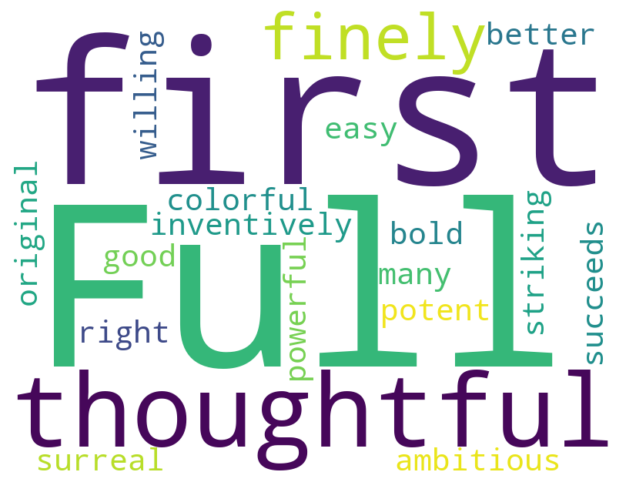

In [ ]:
# Crear lista de todas las palabras
text = " ".join(review for review in df['Review'])
# Dividr el texto en palabras individuales
words = text.split()
# Filtar positivas
positive_words = [word for word in words if TextBlob(word).sentiment.polarity > 0.2]

filtered_text = " ".join(positive_words)

# Configuramos

wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white", width=800, height=600).generate(filtered_text)

# Graficamos
plt.figure(figsize=(8,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

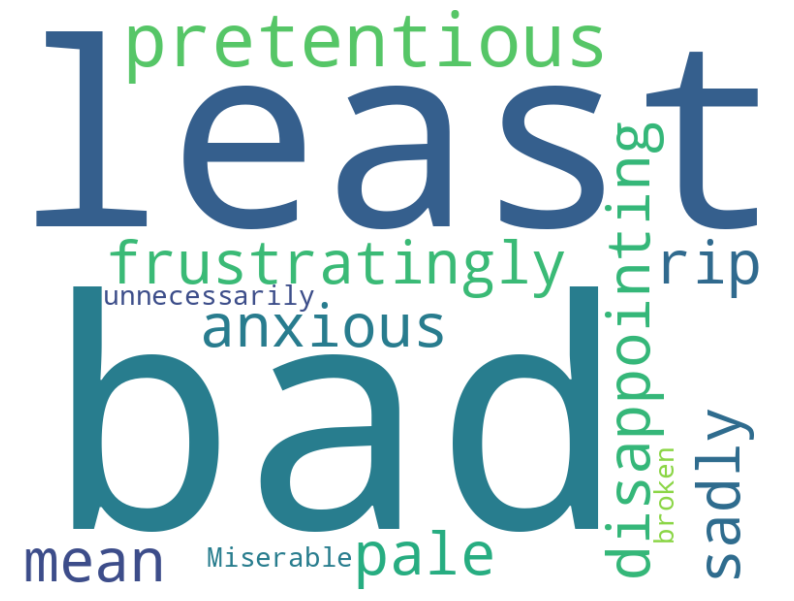

In [ ]:
# Filtrar palabras con polaridad negativa (p. ej., menor a -0.5)
negative_words = [word for word in words if TextBlob(word).sentiment.polarity < -0.2]

# Crear un texto filtrado con las palabras negativas
filtered_text_neg = " ".join(negative_words)

# Configurar WordCloud para palabras negativas
wordcloud_neg = WordCloud(stopwords=STOPWORDS, background_color="white", width=800, height=600).generate(filtered_text_neg)

# Mostrar la nube de palabras negativas
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
def categorize_sentiment(polarity):
    '''Categoriza el sentimiento basado en la polaridad'''
    if polarity > 0.2:
        return 1
    else:
        return -1

# Calcular la polaridad de cada reseña
df['polarity'] = df['Review'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Categorizar el sentimiento basado en la polaridad
df['sentiment'] = df['polarity'].apply(categorize_sentiment)
df.drop('polarity', axis=1, inplace=True)
pd.set_option("display.max_rows", None)
df

,Review,sentiment
0,Phillips stays on the surface and lends them l...,-1
1,"""As if to compensate for the first movie's def...",-1
2,"Folie a Deux functions as an overlong, pretent...",-1
3,Overlong but more finely tuned than the 2019 g...,1
4,Where the original was a problematic but nonet...,1
5,Not a bad movie per se but its accumulation of...,-1
6,A frustratingly obtuse courtroom musical ... Y...,-1
7,"Todd Phillips’ sequel is an empty, overly ambi...",-1
8,"While the intention is easy to admire, the exe...",-1
9,FOLIE Á DEUX may mean this iteration of the Jo...,-1


In [ ]:
import plotly.express as px

# Cambiando los valores de la columna 'sentiment' a 'negative' y 'positive'
df['sentiment'] = df['sentiment'].replace({-1 : 'negative', 1 : 'positive'})

# Creando el histograma
fig = px.histogram(df, x="sentiment")
fig.update_traces(marker_color="indianred",marker_line_color='rgb(8,48,107)',marker_line_width=1.5)
fig.update_layout(title_text='Product Sentiment')
fig.show()

In [ ]:
import pandas as pd

# Cargar el archivo de reseñas proporcionado
file_path = '/content/ResenasJoker2.csv'

# Leer el archivo CSV
reviews_df = pd.read_csv(file_path)

# Mostrar las primeras filas para ver el contenido de las reseñas
reviews_df.head()

,critic-picture src,display-name,display-name href,publication,publication href,review-text,original-score-and-url,full-url href,original-score-and-url 2
0,https://resizing.flixster.com/3QWx7sbLlbwoKybd...,Matthew Rozsa,https://www.rottentomatoes.com/critics/matthew...,Salon.com,https://www.rottentomatoes.com/critics/source/400,"""As if to compensate for the first movie's def...",| Original Score: 3.5/4\n \n ...,https://www.salon.com/2024/10/08/joker-folie--...,"Oct 8, 2024"
1,https://resizing.flixster.com/XdzbyrTkEg8izCdX...,James Berardinelli,https://www.rottentomatoes.com/critics/james-b...,ReelViews,https://www.rottentomatoes.com/critics/source/387,"Folie a Deux functions as an overlong, pretent...",| Original Score: 2/4\n \n ...,https://www.reelviews.net/reelviews/joker-foli...,"Oct 8, 2024"
2,https://resizing.flixster.com/51NRq9rUtARWw1v-...,Rich Cline,https://www.rottentomatoes.com/critics/rich-cline,Shadows on the Wall,https://www.rottentomatoes.com/critics/source/929,Overlong but more finely tuned than the 2019 g...,| Original Score: 3.5/5\n \n ...,http://www.shadowsonthewall.co.uk/24/jokefoli.htm,"Oct 8, 2024"
3,https://resizing.flixster.com/wC8D12h2Md7MBYbI...,Calum Cooper,https://www.rottentomatoes.com/critics/calum-c...,Cinerama Film,https://www.rottentomatoes.com/critics/source/...,Where the original was a problematic but nonet...,| Original Score: 2/5\n \n ...,https://cineramafilm.com/2024/10/07/joker-foli...,"Oct 8, 2024"
4,https://resizing.flixster.com/VO1DhqSDebAo4FiQ...,Alejandro Turdó,https://www.rottentomatoes.com/critics/alejand...,Hoy Sale Cine,https://www.rottentomatoes.com/critics/source/...,Not a bad movie per se but its accumulation of...,|,https://youtu.be/haFX-xocy90,"Oct 8, 2024"


In [ ]:
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import plotly.express as px

# Extraer la columna 'review-text' del nuevo dataset
reviews_new = reviews_df['review-text']

# Crear lista de todas las palabras del texto de las reseñas
text_new = " ".join(review for review in reviews_new)
words_new = text_new.split()


In [ ]:

# Filtar palabras positivas y negativas
positive_words_new = [word for word in words_new if TextBlob(word).sentiment.polarity > 0.2]
negative_words_new = [word for word in words_new if TextBlob(word).sentiment.polarity < -0.2]

# Crear texto filtrado con las palabras positivas y negativas
filtered_text_pos_new = " ".join(positive_words_new)
filtered_text_neg_new = " ".join(negative_words_new)

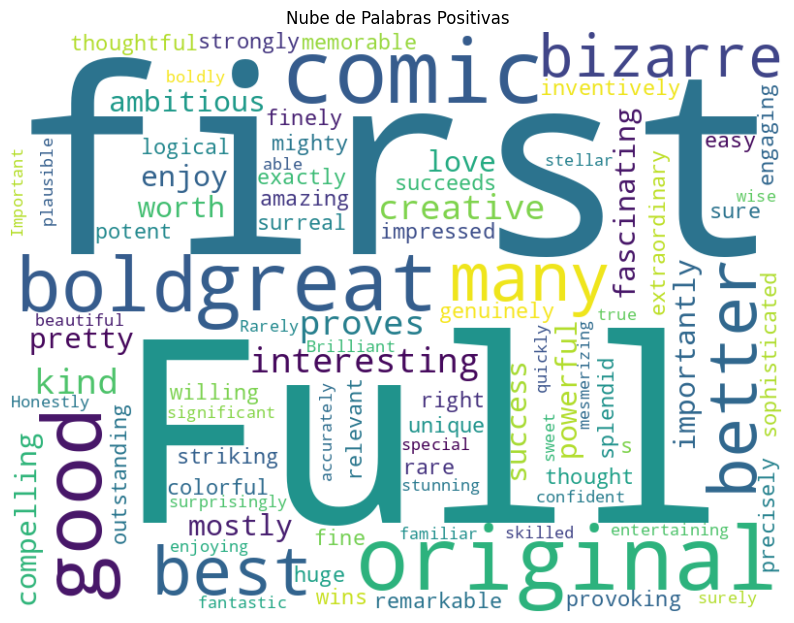

In [ ]:
# Generar nubes de palabras positivas
wordcloud_pos_new = WordCloud(stopwords=STOPWORDS, background_color="white", width=800, height=600).generate(filtered_text_pos_new)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud_pos_new, interpolation='bilinear')
plt.axis("off")
plt.title("Nube de Palabras Positivas")
plt.show()

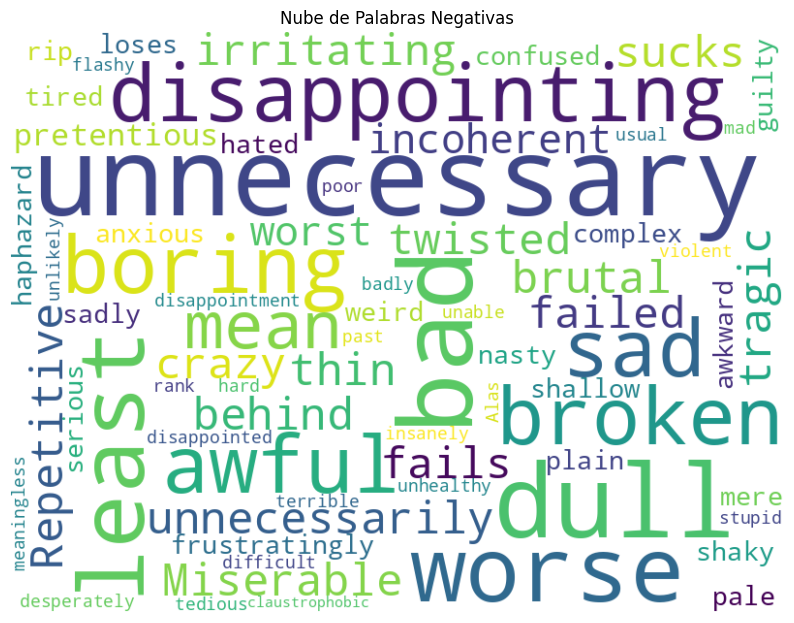

In [ ]:
# Generar nubes de palabras negativas
wordcloud_neg_new = WordCloud(stopwords=STOPWORDS, background_color="white", width=800, height=600).generate(filtered_text_neg_new)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud_neg_new, interpolation='bilinear')
plt.axis("off")
plt.title("Nube de Palabras Negativas")
plt.show()

In [ ]:
# Calcular la polaridad de cada reseña
reviews_df['polarity'] = reviews_new.apply(lambda x: TextBlob(x).sentiment.polarity)

# Categorizar el sentimiento basado en la polaridad
def categorize_sentiment(polarity):
    if polarity > 0.2:
        return 1  # Positivo
    else:
        return -1  # Negativo

reviews_df['sentiment'] = reviews_df['polarity'].apply(categorize_sentiment)
reviews_df.drop('polarity', axis=1, inplace=True)

# Cambiar los valores de la columna 'sentiment' a 'negative' y 'positive'
reviews_df['sentiment'] = reviews_df['sentiment'].replace({-1: 'negative', 1: 'positive'})


In [ ]:
# Crear el histograma de la distribución de los sentimientos
fig = px.histogram(reviews_df, x="sentiment")
fig.update_traces(marker_color="indianred", marker_line_color='rgb(8,48,107)', marker_line_width=1.5)
fig.update_layout(title_text='Distribución de Sentimientos en las Reseñas del Joker')
fig.show()